In [1]:
print('Hello, world!')

Hello, world!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
headers = ['sepal-length','sepal-width','petal-length', 'petal-width','Class']

In [ ]:
data = pd.read_csv(path, names=headers)

In [ ]:
data.shape

(150, 5)

In [ ]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = data.iloc[: , :-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = NB_classifier.predict(X_train)

In [ ]:
accuracy_score(y_train,y_pred)

0.9523809523809523

In [ ]:
accuracy_score(y_true=y_train,y_pred=y_pred)

0.9523809523809523

In [ ]:
y_pred = NB_classifier.predict(X_test)

In [ ]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.9777777777777777

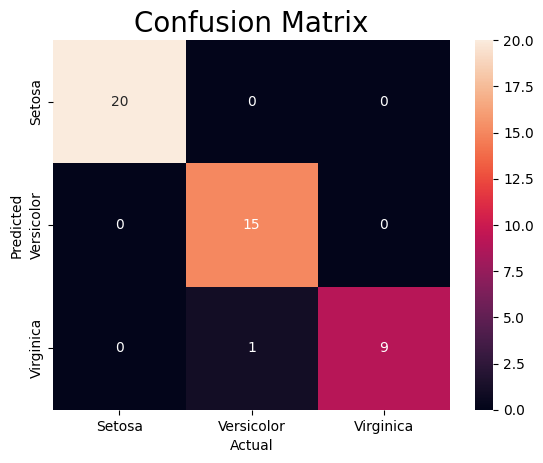

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

report = confusion_matrix(y_test,y_pred)
sns.heatmap(report,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix',fontsize=20)
plt.show()

In [ ]:
from sklearn.svm import SVC

accuracies =  {'linear':0,'poly':0,'rbf':0,'sigmoid':0}

for i in accuracies.keys():
  clf = SVC(kernel = i)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  score = accuracy_score(y_test,y_pred)
  accuracies[i]=score

  print(i,' is ', score)

linear  is  0.9777777777777777
poly  is  0.9333333333333333
rbf  is  0.9555555555555556
sigmoid  is  0.9333333333333333


In [ ]:
accuracies.keys()

dict_keys(['linear', 'poly', 'rbf', 'sigmoid'])

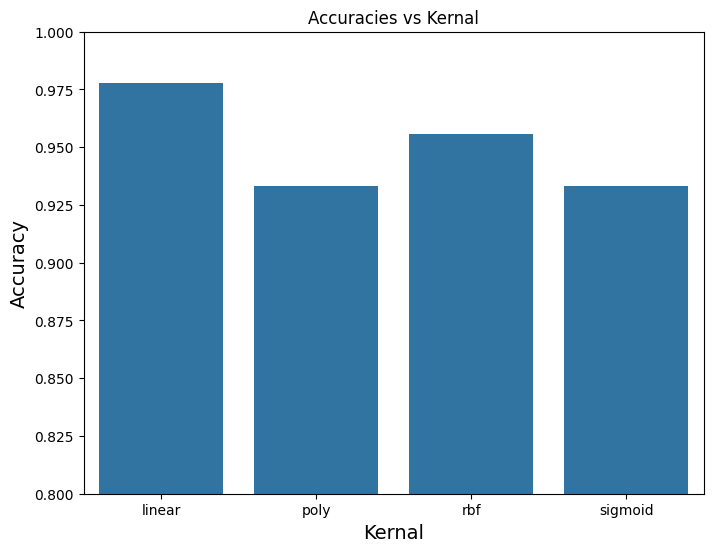

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=accuracies.keys(),y=accuracies.values())
plt.xlabel('Kernal',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Accuracies vs Kernal')
plt.ylim(0.8,1)
plt.show()